# Introduction to Probability

This notebook accompanies the Introduction to Probability lecture and includes the simulations and visualizations for different examples of the use of probability theory in practice. The aim of these examples is to build an intuition on how probability works.

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli

## Example 1: a coin toss

In [28]:
possible_outcomes = ['head', 'tail']

def toss_coin(possible_outcomes):
    outcome = random.sample(possible_outcomes, 1)[0]
    return outcome

toss_coin(possible_outcomes)

'tail'

In [29]:
def toss_coin_multiple_times(possible_outcomes, count):
    outcomes = []
    for i in range(count):
        outcome = toss_coin(possible_outcomes)
        outcomes.append(outcome)
    return outcomes

toss_coin_multiple_times(possible_outcomes, 10)

['tail',
 'tail',
 'tail',
 'head',
 'tail',
 'tail',
 'tail',
 'head',
 'tail',
 'head']

In [30]:
# how often do we get head vs tail?

def count_outcomes(outcomes):
    outcome_summary = {} 
    for outcome in outcomes:
        if outcome in outcome_summary:
            outcome_summary[outcome] += 1
        else:
            outcome_summary[outcome] = 1
    return outcome_summary

def plot_outcomes(outcomes_summary):
    fig, ax = plt.subplots(clear=True)
    x_values = list(outcomes_summary.keys())
    y_values = list(outcomes_summary.values())
    ax.bar(x_values, y_values)
    ax.title.set_text(f"{sum(y_values)} tosses")
    ax.set_xticks(x_values)


{'head': 7, 'tail': 3}


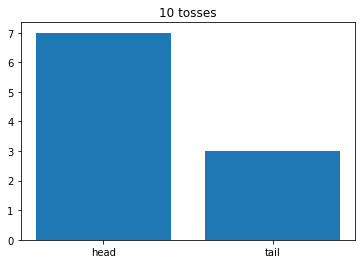

In [31]:
outcomes = toss_coin_multiple_times(possible_outcomes, count=10)
outcomes_summary = count_outcomes(outcomes)
print(outcomes_summary)
plot_outcomes(outcomes_summary)

Look into the results above: 

- did you ever get 10 heads or 10 tails, and 0 for the other option?
- what happens if there are more tosses, say 100?

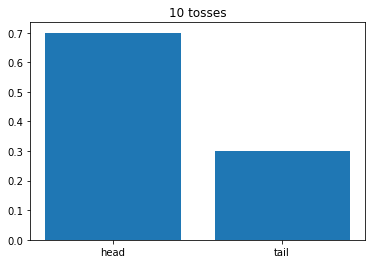

In [32]:
def plot_outcomes_normalized(outcomes_summary):
    fig, ax = plt.subplots(clear=True)
    toss_count = sum(list(outcomes_summary.values()))
    x_values = list(outcomes_summary.keys())
    y_values = np.array(list(outcomes_summary.values())) / toss_count
    ax.bar(x_values, y_values)
    ax.title.set_text(f"{toss_count} tosses")
    ax.set_xticks(x_values)

plot_outcomes_normalized(outcomes_summary)

In [33]:
# here go to slides and briefly introduce the concept of probability distribution 
# (slides 3-5 https://docs.google.com/presentation/d/1YInfL0FQCwfKzl20R0SuDB0SuvpoQVQ7dYsTHFY5-D4/edit?usp=sharing)

# Example 2: Rolling a die

What if instead of a coin, we had a die? What would the simulation look like then?

In [39]:
# TODO: write the same simulation here, but instead of tossing a coin, the simulation should roll a 6-sided die

# Example 3: Weighted coin

Going back to the coin example: what if we somehow temper with the coin, and head and tail are not equally likely anymore? We make a weighted coin and look into its behavior.

{}


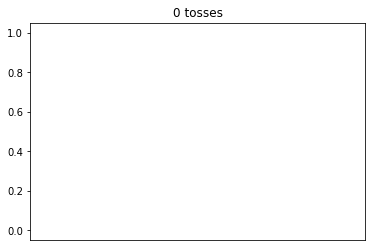

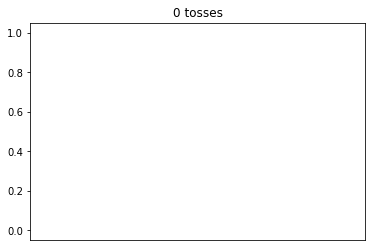

In [44]:
# what we had before:

def toss_coin(possible_outcomes):
    outcome = random.sample(possible_outcomes, 1)[0]
    return outcome

toss_coin(possible_outcomes)

# when the coin is weighted:

possible_outcomes = ['head', 'tail']
p_head = 0.2

def toss_weighted_coin(possible_outcomes, p):
    
    outcome = None
    
    # TODO: write code here that has p_head probability of getting head from ['head', 'tail'] possible outcomes
    # hint: the random() function from the package random could be useful
    
    return outcome

def toss_weighted_coin_multiple_times(possible_outcomes, count, p):
    
    outcomes = []

    # TODO: write code here that tosses a weighted coin 'count' times with probability of getting a head p
    
    return outcomes

# toss_weighted_coin(possible_outcomes, p=p_head)

outcomes = toss_weighted_coin_multiple_times(possible_outcomes, count=10, p=p_head)
outcomes_summary = count_outcomes(outcomes)
print(outcomes_summary)
plot_outcomes(outcomes_summary)
plot_outcomes_normalized(outcomes_summary)

In [37]:
# mention monte carlo here and ask to repeat the process 
# (eg even write a for loop to find happens when it is repeated many times)

In [40]:
# what if p_head = 0.5? - repeat the simulation above to see

[0 0 0 1 0 0 1 1 1 0]


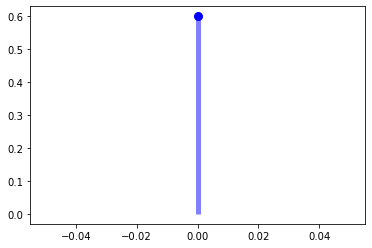

In [52]:
# do we always have to estimate? can we sometimes compute directly?

# there is specific probability distribution that can describe this

p_head = 0.4

print(bernoulli.rvs(p_head, size=10))

x = np.arange(bernoulli.ppf(0.01, p_head),
              bernoulli.ppf(0.99, p_head))

fig, ax = plt.subplots(1, 1)
ax.plot(x, bernoulli.pmf(x, p_head), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p_head), colors='b', lw=5, alpha=0.5)

# Example 4: unfair die - to include or not?

What if instead of unfair coin, we had an unfair die? 

In [ ]:
# write code here to simulate a die that is most likely to get 5 and 6 and less likely to get other values

# Example: multiple coin tosses 

If we toss a coin 3 times, what is the probability that we get exactly 2 heads?

What are the possible outcomes here, what are the events?

In [ ]:
# see slides

In [ ]:
def toss_coin_n_times(possible_outcomes, n):
    outputs = []
    
    # write code here
    
    return outputs

number_of_trials = None 
possible_outcomes = None

toss_coin_n_times(possible_outcomes, number_of_trials)

{0: 6, 1: 4}


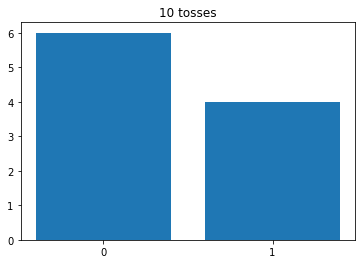

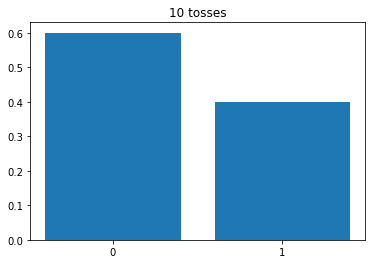

In [38]:
# Using a library for the same simulation:

p_head = 0.2

possible_outcomes = [
    0, # tail
    1  # head
]

number_of_trials = 10

outcomes = binom.rvs(n=number_of_trials, p=head_probability, size=toss_counts).tolist()
outcomes_summary = count_outcomes(outcomes)

print(outcomes_summary)
plot_outcomes(outcomes_summary)
plot_outcomes_normalized(outcomes_summary)